# PFAS Radicals: A Quantum Chemistry Perspective  
---
In this lab exercise, you will:  
  
>  
>**Module 1**  
>  
>1. Model the equilibrium geometry and IR frequencies of the CH3 radical and compare to the CF3 radical  
>2. Develop a Python function to parse data from ORCA output files  
>
>**Module 2**  
>  
>3. Scan the X-C-X bond angle from 120 degrees (trigonal planar) to 109.5 degrees (tetrahedral) and compare results between the CH3 radical and the CF3 radical  
>4. Develop a Python function to write and edit ORCA input files  
>
>**Module 3**  
>  
>5. Use Python to analyze results from your ORCA calculations  
>  
  
This module will cover items **3** and **4**.

## Module 3: Analysis 
---  
Now that you have collected your data and assembled it into a \*.csv file you can begin your analysis.  
  
>**NOTE:** Some simple python examples to make plots from your data are included after the guiding questions.  
  
    
#### Research Question  
Why is the CH3 radical planar while the CF3 radical is non-planar? What can these structural differences tell you about reactivity?  
  
  
  
*To begin to answer this central research question, start with these guiding prompts:*   
  
##### Parameter Sweeps
  
>**CAUTION:** The example python functions will normalize the data for each trace to the range (0,1). This is useful to make qualitative comparisons but should not be interpreted as a percent. Plotting the raw data is also supported if you want to make absolute comparisons.  
  
1. How does the energy of each molecule change as the bond angle changes?
1. How does the bond length change as the bond angle changes? What does this imply about bond strength?
1. How does the C-X IR frequency change as the bond angle changes? Is this consistent with predictions from bond lengths alone? What does this imply about the electron density?  
1. How does the partial charge on the carbon atoms versus the heteroatoms change as the bond angle changes? What does this tell you about the electron density?  Is this consistent with the predictions from the IR and bond length data?  

##### Molecular Orbitals  
1. Draw an orbital interaction diagram for each system by hand without examining the MO energies from your dataset. What predictions can you make about the frontier orbitals and their shapes?  
1. Examine the molecular orbital geometries for the optimized CF3 and CH3 radicals. Are the geometries consistent with your predictions?  
The molecular orbital geometries for the alpha orbitals were generated for you from the optimized geometry output files and are included in the folder `\mo_geometries`. Colors indicate orbital phase.  
1. Examine the density of states plot below.  
<img src="./density_of_states_plot/DOS_plot.png" alt="DOS_plot" width="800"/>  
Figure 1. Partial density of states for the CF3 radical and the CH3 radical at their optimized geometries.   
  
    The orbital density of states (DOS) is an idea borrowed from solid-state physics to explain bandgaps in materials, and is not strictly defined for systems with discrete energy levels (like molecules). Regardless, we can use a DOS plot to track the contribution of each set of atomic orbitals to the total molecular orbitals. Because we performed an unrestricted calculation, both alpha (spin up) and beta (spin down) orbitals were calculated. Data for the alpha orbitals is shown as positive, and vice versa for the beta orbitals. To approximate the electron density of each molecular orbital, ORCA used a linear combination of the atomic orbitals on the atoms we provided. The coefficients describing the contribution of each atomic orbital to the total molecular orbital are related to the orbital DOS. While the absolute value of the DOS is not significant, relative comparisons reveal which types of atomic orbitals contribute most to the total orbital density of states (TDOS). For example, the alpha SOMO of the CH3 radical is almost completely dominated by the carbon p orbitals, while the HOMO-2 is a mixture of carbon  and hydrogen s orbitals. The information used to generate the DOS plot is the result of the Mulliken Population Analysis you can find in any output file.  
  
    In the plot above, the average energy of the alpha and beta orbitals is plotted with black lines. Line height corresponds to the degeneracy of the molecular orbitals as indicated by the axis to the right. Shaded curves show a smoothed version of the partial density of states for the alpha orbitals, while the unshaded curves show the same information for the beta orbitals. As we can see, the alpha and beta orbitals are very similar, but not exactly the same. When this happends, we say that there is low **spin polarization**. Most of the occupied orbitals show similar well-behaved values for the partial desnity of states, while the unoccupied orbitals have much higher variance in the partial density of states. Where shaded regions appear below the line x=0, the partial density of states is inverted and that atomic orbital has a negative contribution to the molecular orbital.  

    **Q-**  
    Are the results of the orbital density of states analysis consistent with the molecular orbital geometries? In what ways is it similar or different from your orbital interaction diagrams?  

1. Now that you have thoroughly analyzed the structure and bonding of the two systems, **generate a hypothesis to explain the distortion**. How might the frontier orbital energies impact the structure? Make a few plots to test your hypothesis.  
  
---
  
### Research Question Response  
Once you have completed the guiding questions, work to answer the central **research question** using data-informed claims. Be sure to plot important results in a short write-up.    
  
*Optional Extension Questions:*  
1. What do the results of this study suggest about the geometry of other halogenated radicals? Make and test predictions about the bond angle of the CCl3, CBr3 and CI3 radicals. The basis set and functional used in this study does not include the heavier halogens. Try using the following basis set/ functional combination instead: `PBE0/aug-cc-PVTZ`  
1. How might you design a catalyst to disrupt the orbital interactions that lead to radical stability? Could you design a catalyst to enforce non-planar geometry on the CH3 radical, or planar geometry on the CF3 radical?  
1. There are other ways of analyzing molecular orbitals and hybridization. Identify two other methods and describe how they work.  
  

  

### Python Plotting Functions  
---  
The code below can be used to plot your data. You may edit the functions if you are comfortable, or write your own.  
Be sure to run the cell before using these functions. The cell will also import your data.  

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# general plotting function - default to normalize
def plot_data(dataframe, y, x = "bond_angle[deg]", normalize = True, get_figure = False):

    fig, ax = plt.subplots()

    for series_name, group in dataframe.groupby('heteroatom'):

        group.sort_values(x, inplace=True)
        x_data = group[x]
        y_data = group[y]

        if normalize == True:
            y_data = normalize_data(y_data)

        ax.plot(x_data, y_data, markersize = 3.5, marker='o', linestyle='-', label=series_name)


    ax.set_xlabel(x), ax.set_ylabel(y)
    ax.legend()

    if get_figure == True:
        return fig, ax

# useful to add lines for the bond angles of the optimized geometries
def add_vertical_lines(fig, ax, vertical_lines = [111.4, 120], get_figure = False):

    ymin, ymax = ax.get_ylim()
    ax.vlines(vertical_lines, ymin, ymax, color="red")

    if get_figure == True:
        return fig, ax
    
def save_plot(figure, filename):
    plt.savefig(figure, filename)

def normalize_data(data):
    # normalize to (0,1)
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return normalized_data

# import the data
dataframe = pd.read_csv("./summary_data.csv")


### Parameter Sweeps  
---

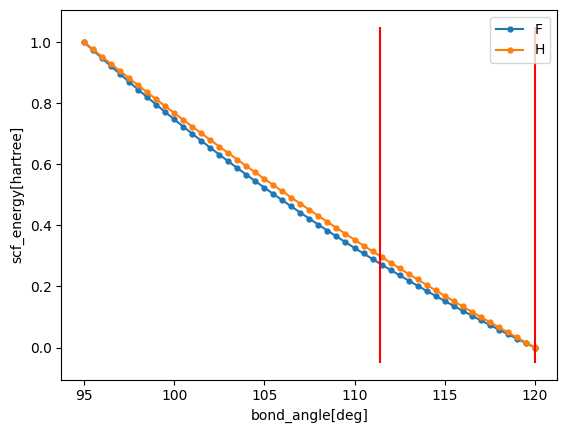

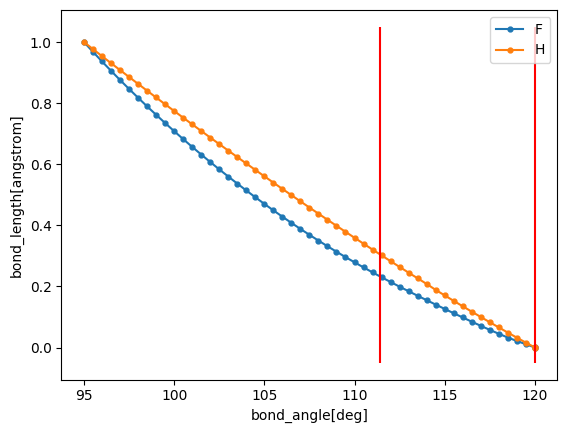

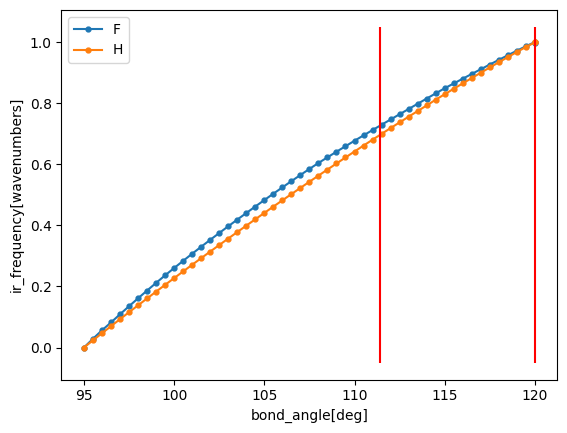

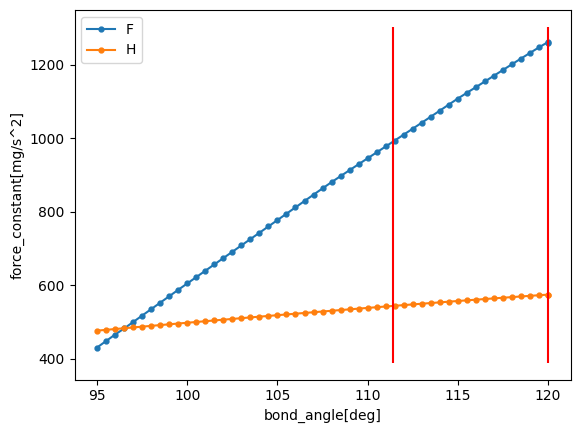

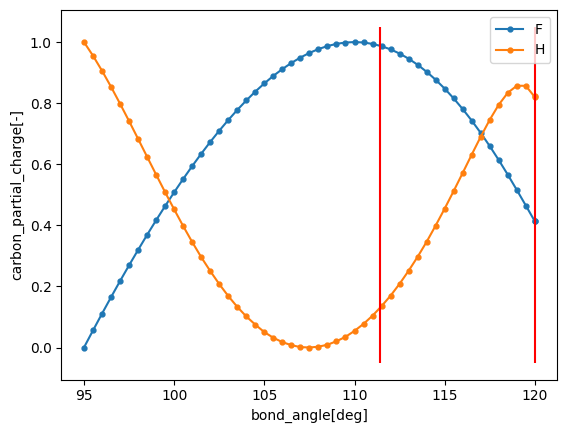

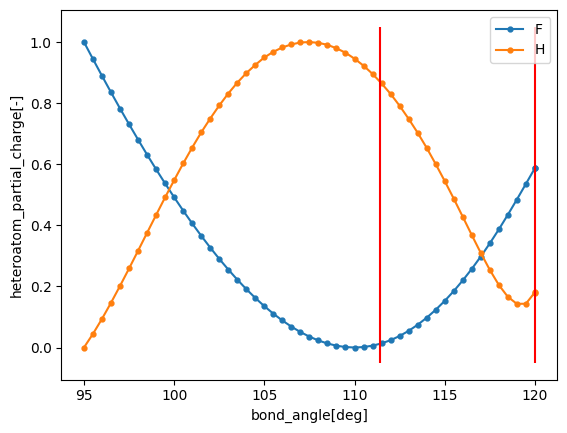

In [15]:
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "scf_energy[hartree]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "bond_length[angstrom]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "ir_frequency[wavenumbers]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "force_constant[mg/s^2]", normalize = False, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "carbon_partial_charge[-]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "heteroatom_partial_charge[-]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)

### Molecular Orbitals  
---
You may plot the energy profile of each molecular orbital independently, or you may choose to use the code below to plot all molecular orbitals on a single plot.

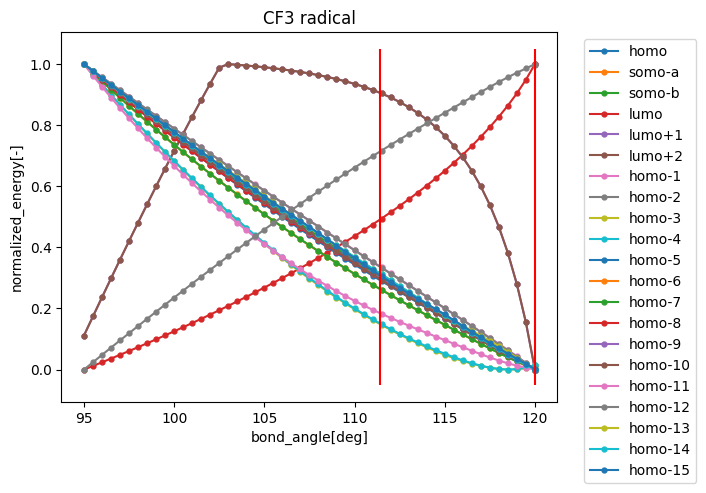

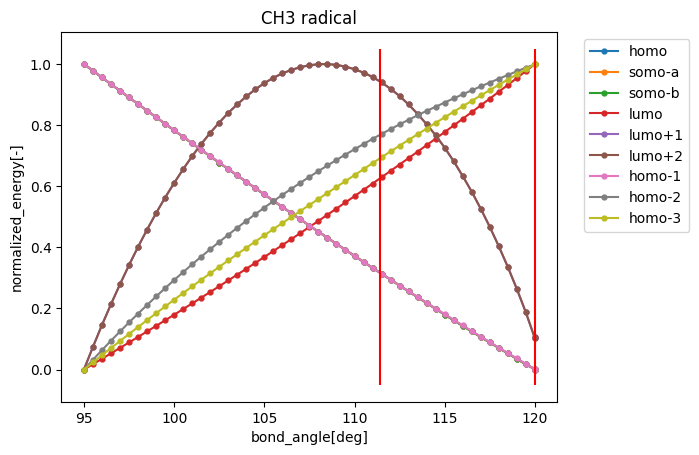

In [17]:
for series_name, group in dataframe.groupby('heteroatom'):
    fig, ax = plt.subplots()
    for mo_energy in dataframe.columns[9:]:
        group.sort_values('bond_angle[deg]', inplace=True)
        x_data = group['bond_angle[deg]']
        y_data = group[mo_energy]
        y_data = normalize_data(y_data)
        if y_data.any() == 0.0:
            continue
        label_name = mo_energy.split("_")[0]
        ax.plot(x_data, y_data, markersize = 3.5, marker='o', linestyle='-', label=label_name)
    
    ax.set_xlabel("bond_angle[deg]")
    ax.set_ylabel("normalized_energy[-]")
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.set_title("C" + series_name +"3 radical")
    add_vertical_lines(fig, ax)

##### Grouped Molecular Orbitals  
To simplify the analysis, you may choose to group certain orbitals to look at average trends.  

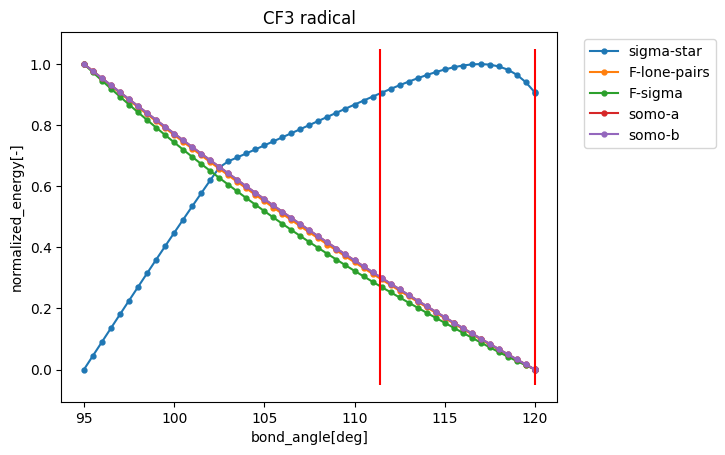

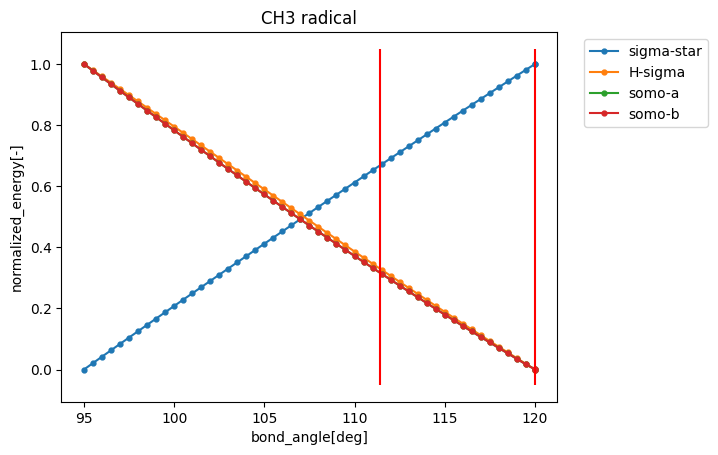

In [19]:
dataframe = pd.read_csv("./summary_data.csv")

# group orbitals for plotting
sigma_star = ['lumo_energy[hartree]', 'lumo+1_energy[hartree]', 'lumo+2_energy[hartree]']
F_lone_pairs = ['homo_energy[hartree]', 'homo-1_energy[hartree]', 'homo-2_energy[hartree]', 'homo-3_energy[hartree]','homo-4_energy[hartree]']
F_sigma = ['homo-5_energy[hartree]', 'homo-6_energy[hartree]', 'homo-7_energy[hartree]','homo-8_energy[hartree]']
H_sigma = ['homo_energy[hartree]', 'homo-1_energy[hartree]', 'homo-2_energy[hartree]']

orbitals = [sigma_star, F_lone_pairs, F_sigma, H_sigma]
orbital_names = ["sigma-star_energy[hartree]", "F-lone-pairs_energy[hartree]", "F-sigma_energy[hartree]", "H-sigma_energy[hartree]"]

# average the energies of the grouped orbitals
simplified_dataframe = dataframe.iloc[:,:3]
for orbital, orbital_name in zip(orbitals, orbital_names):
    grouped_orbitals = [dataframe[idx] for idx in orbital]
    simplified_dataframe[orbital_name] = pd.concat(grouped_orbitals, axis=1).mean(axis=1)

# add the somos to the plot
simplified_dataframe["somo-a_energy[hartree]"] = dataframe["somo-a_energy[hartree]"]
simplified_dataframe["somo-b_energy[hartree]"] = dataframe["somo-b_energy[hartree]"]

# plot the grouped orbitals
for series_name, group in simplified_dataframe.groupby('heteroatom'):
    fig, ax = plt.subplots()
    for mo_energy in simplified_dataframe.columns[3:]:
        if (series_name == "F") and ("H-sigma" in mo_energy):
            continue
        if (series_name == "H") and ("F" in mo_energy):
            continue
        group.sort_values('bond_angle[deg]', inplace=True)
        x_data = group['bond_angle[deg]']
        y_data = group[mo_energy]
        y_data = normalize_data(y_data)
        label_name = mo_energy.split("_")[0]
        ax.plot(x_data, y_data, markersize = 3.5, marker='o', linestyle='-', label=label_name)
    
    ax.set_xlabel("bond_angle[deg]")
    ax.set_ylabel("normalized_energy[-]")
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.set_title("C" + series_name +"3 radical")
    add_vertical_lines(fig, ax)

* scf energy increases in CF3 radical as it becomes planar
* CF bond is shortest (strongest, tightest bond) when just out of plane (when in plane the adjacent F lps donate into sigma star)
* CF bond lengthens + weakens as the structure is deformed, but the effect is non-linear  
* force constants are consistent and show that the C-F bond is stronger than the C-H bond  
* force constants also corroborate the bond lenght information - CF bond is strongest / stiffest when planar  
* around the minimum CF bond length, the force constant begins to change at a different rate, perhaps indicating a switchi over in the driving mechanism  
* as C is pulled out of the plane, it bears more of the radical and goes more negative in charge  
* then the SOMO strts to mix with other orbitals, delocalizing the negative charge through sigma orbitals instead of the F p orbitals in the planar config 
* at around 105 degrees, most of the radical is locatted in the negative fluorine clump (distoring the structure causes the localizaton of the radical to change)  
* the crude qualitative analysis of the frontier orbitals shows the best geometries are related to the energy of the different orbitals - orbital geometry and anisotropy impact the energy of the orbitals  
* the primary driver of the distortion is the differing nature of the sigma bonds between C-H and C-F  